Data wrangling

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
df = pd.read_csv('dreaddit-train.csv')
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [5]:
#Number of rows and columns
print("Rows    :",df.shape[0])
print("Columns :",df.shape[1])

Rows    : 2838
Columns : 116


In [4]:
#Column names in dataset
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [6]:
#Datatypes of dataset
df.dtypes

subreddit                    object
post_id                      object
sentence_range               object
text                         object
id                            int64
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments           int64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [8]:
#Check for missing values
df.isnull().sum().sum()

0

In [18]:
#Check which column to use for our model
df['text'][0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [15]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

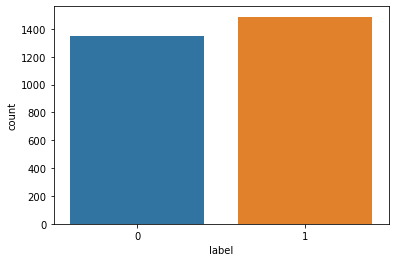

In [19]:
sns.countplot(df['label'])

In [24]:
df['length'] = df.text.str.len()
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,length
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,571
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,588
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894,847
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671,1277
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,533


In [25]:
df = df[['label','text','length']]
df.head()

,label,text,length
0,1,"He said he had not felt that way before, sugge...",571
1,0,"Hey there r/assistance, Not sure if this is th...",588
2,1,My mom then hit me with the newspaper and it s...,847
3,1,"until i met my new boyfriend, he is amazing, h...",1277
4,1,October is Domestic Violence Awareness Month a...,533


In [21]:
#Importing libraries for text preprocessing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [26]:
stemmer = SnowballStemmer(language='english')
stopword = set(stopwords.words('english'))

In [28]:
#Text Pre-processing
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ')if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
df['text'] = df['text'].apply(clean)

In [29]:
df.head()

,label,text,length
0,1,said felt way sugget go rest trigger ahead you...,571
1,0,hey rassist sure right place post goe im curr...,588
2,1,mom hit newspap shock would know dont like pla...,847
3,1,met new boyfriend amaz kind sweet good student...,1277
4,1,octob domest violenc awar month domest violenc...,533


In [30]:
df['new_length'] = df.text.str.len()

df.head()

,label,text,length,new_length
0,1,said felt way sugget go rest trigger ahead you...,571,305
1,0,hey rassist sure right place post goe im curr...,588,368
2,1,mom hit newspap shock would know dont like pla...,847,401
3,1,met new boyfriend amaz kind sweet good student...,1277,597
4,1,octob domest violenc awar month domest violenc...,533,282


<AxesSubplot:xlabel='length', ylabel='Density'>

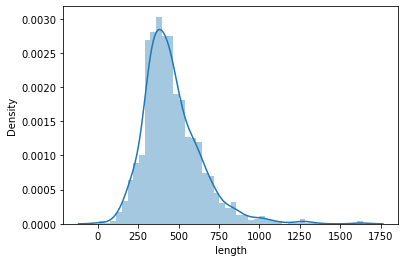

In [32]:
# Message distribution BEFORE cleaning for 1 indicates 'Stress'
sns.distplot(df[df['label']==1]['length'])

<AxesSubplot:xlabel='length', ylabel='Density'>

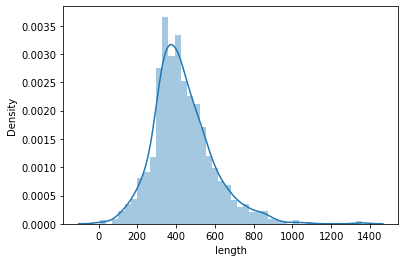

In [33]:
# Message distribution BEFORE cleaning for 0 indicates 'No stress'
sns.distplot(df[df['label']==0]['length'])

<AxesSubplot:xlabel='new_length', ylabel='Density'>

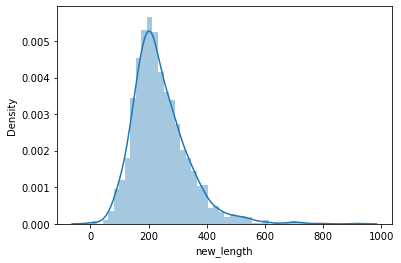

In [34]:
# Message distribution After cleaning for 1 indicates 'Stress'
sns.distplot(df[df['label']==1]['new_length'])

<AxesSubplot:xlabel='new_length', ylabel='Density'>

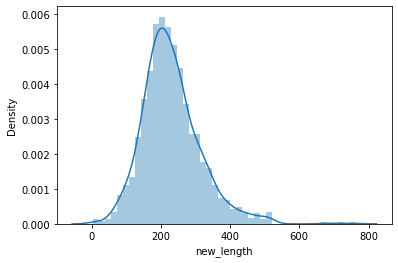

In [35]:
# Message distribution After cleaning for 0 indicates 'No Stress'
sns.distplot(df[df['label']==0]['new_length'])

In [36]:
from wordcloud import WordCloud

In [37]:
b = df['text'][df['label']==1]

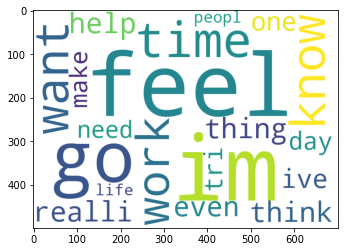

In [38]:
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(b))
plt.imshow(spam_cloud)

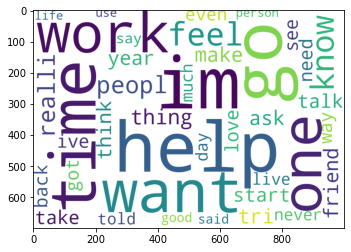

In [42]:
c = df['text'][df['label']==0]
spam_cloud1 = WordCloud(width=1000,height=700,background_color='white',max_words=40).generate(' '.join(c))
plt.imshow(spam_cloud1)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [45]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text']).toarray()
Y = df['label']

In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
Y

0       1
1       0
2       1
3       1
4       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2838, dtype: int64

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1986, 7842)
(852, 7842)
(1986,)
(852,)


In [49]:
bnm = BernoulliNB()
bnm.fit(X_train,y_train)
y_bnm = bnm.predict(X_test)
y_bnm

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [50]:
accuracy_score(y_test,y_bnm)

0.7453051643192489

In [52]:
print(classification_report(y_test,y_bnm))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       398
           1       0.73      0.82      0.77       454

    accuracy                           0.75       852
   macro avg       0.75      0.74      0.74       852
weighted avg       0.75      0.75      0.74       852



In [54]:
#Prediction
user = input("Enter a Text : ")
data = tfidf.transform([user]).toarray()
output = bnm.predict(data)
print(output)

Enter a Text : People need to take care of their mental health
[0]


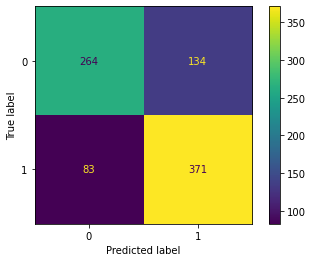

In [57]:
plot_confusion_matrix(bnm,X_test,y_test)

In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_mnb = mnb.predict(X_test)
y_mnb

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [59]:
print(accuracy_score(y_test,y_mnb))
print(classification_report(y_test,y_mnb))

0.7089201877934272
              precision    recall  f1-score   support

           0       0.86      0.45      0.59       398
           1       0.66      0.94      0.77       454

    accuracy                           0.71       852
   macro avg       0.76      0.69      0.68       852
weighted avg       0.75      0.71      0.69       852



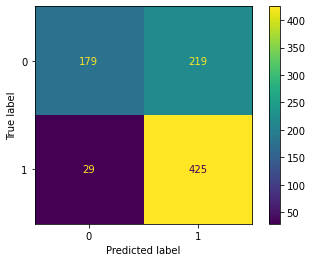

In [60]:
plot_confusion_matrix(mnb,X_test,y_test)

In [61]:
#Prediction
user = input("Enter a Text : ")
data = tfidf.transform([user]).toarray()
output = mnb.predict(data)
print(output)

Enter a Text : People need to take care of their mental health
[0]


In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
y_lr

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [63]:
print(accuracy_score(y_test,y_lr))
print(classification_report(y_test,y_lr))

0.7546948356807511
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       398
           1       0.78      0.76      0.77       454

    accuracy                           0.75       852
   macro avg       0.75      0.75      0.75       852
weighted avg       0.76      0.75      0.75       852



In [64]:
#Prediction
user = input("Enter a Text : ")
data = tfidf.transform([user]).toarray()
output = lr.predict(data)
print(output)

Enter a Text : People need to take care of their mental health
[0]


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf = rf.predict(X_test)
y_rf

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [66]:
print(accuracy_score(y_test,y_rf))
print(classification_report(y_test,y_rf))

0.7382629107981221
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       398
           1       0.73      0.81      0.77       454

    accuracy                           0.74       852
   macro avg       0.74      0.73      0.73       852
weighted avg       0.74      0.74      0.74       852



In [67]:
#Prediction
user = input("Enter a Text : ")
data = tfidf.transform([user]).toarray()
output = rf.predict(data)
print(output)

Enter a Text : People need to take care of their mental health
[0]


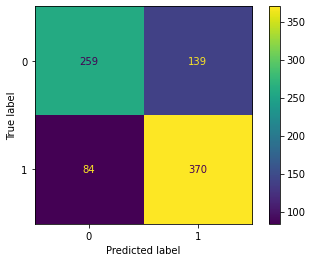

In [68]:
plot_confusion_matrix(rf,X_test,y_test)

Deep Learning

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Embedding,LSTM,SpatialDropout1D,GRU
from tensorflow.keras.models import Sequential

In [71]:
X_train = pad_sequences(X_train,maxlen=200)
X_test = pad_sequences(X_test,maxlen=200)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1986, 200)
(852, 200)
(1986,)
(852,)


In [73]:
model = Sequential()
model.add(Embedding(10000,128,input_length=200))
model.add(LSTM(64,dropout=0.20))
model.add(Dense(1,activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=[X_test,y_test])

Epoch 1/10
63/63 [==============================] - 36s 374ms/step - loss: 0.6934 - accuracy: 0.5222 - val_loss: 0.6911 - val_accuracy: 0.5329
Epoch 2/10
63/63 [==============================] - 16s 253ms/step - loss: 0.6930 - accuracy: 0.5096 - val_loss: 0.6929 - val_accuracy: 0.5329
Epoch 3/10
63/63 [==============================] - 12s 188ms/step - loss: 0.6932 - accuracy: 0.5121 - val_loss: 0.6915 - val_accuracy: 0.5329
Epoch 4/10
63/63 [==============================] - 12s 190ms/step - loss: 0.6925 - accuracy: 0.5206 - val_loss: 0.6916 - val_accuracy: 0.5329
Epoch 5/10
63/63 [==============================] - 14s 225ms/step - loss: 0.6928 - accuracy: 0.5206 - val_loss: 0.6916 - val_accuracy: 0.5329
Epoch 6/10
63/63 [==============================] - 13s 202ms/step - loss: 0.6926 - accuracy: 0.5206 - val_loss: 0.6911 - val_accuracy: 0.5329
Epoch 7/10
63/63 [==============================] - 18s 294ms/step - loss: 0.6931 - accuracy: 0.5206 - val_loss: 0.6914 - val_accuracy: 0.5329

In [78]:
model.evaluate(X_test,y_test)

27/27 [==============================] - 1s 32ms/step - loss: 0.6915 - accuracy: 0.5329


[0.6915141344070435, 0.5328638553619385]